# Fundamentals of Data Analysis (FoDA) - Project 2020

                                                                          Author: Sheldon D'Souza, email: G00387857@gmit.ie

***

## Objective

The objective of the project is to perform and explain simple linear regression using Python on the powerproduction dataset given. The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.

The git repository will contain, at a minimum, the following items:
1. Jupyter notebook that performs simple linear regression on the data set.
2. In that notebook, an explanation of your regression and an analysis of its accuracy.
3. Standard items in a git repository such as a README.

To enhance the submission, consider comparing simple linear regression to other types of regression on this data set.

## Project Plan:

- Use lecture notes from FoDA and ProgDA modules (Machine learning - sklearn) which goes regression and machine learning concepts
- Read through and research linear regression and other forms of regression (e.g. exponential etc)
- add powerproduction.csv to the repository
- load the csv file into a pandas dataframe
- analyse the data to ensure its integrity
- plot the data using a lineplot and regression plot
- use sklearn to perform linear regression and analyse the results
- perform other sorts of analysis


## Introduction

What is regression and the forms of regression


**[TO BE COMPLETED]**


What is the purpose and uses of regression

**[TO BE COMPLETED]**



## Import the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')



## Import the csv and load pandas dataframe

In [2]:
df = pd.read_csv('powerproduction.csv', sep=',')

## Analyse the dataset

#### Analyse the head of the dataframe

In [3]:
df.head(10) #Analyse the first few rows

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


#### Analyse the tail of the dataframe

In [4]:
df.tail(10) #Analyse the last  few rows

,speed,power
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0
499,25.000,0.0


#### Analyse the summay of the dataframe

In [5]:
df.describe() # check summary of data

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### Commentary on analysis of the above dataset

As can be seen from above:
- The data has no missing values and has the same number of observations for both columns/variables
- As typical for Wind Turbines there is a cut-in value and a cut-off value i.e. the wind speed before which the power output is nil (or minimal) and the wind speed after which the power remains constant respectively.
- A number of observations for power are Nil even after within the range of the cut-in and cut-off values. Furthermor, as can be seen from the analysis of the tail of the data the ending values of the dataset are mainly Nil. This could be anomolies in oberving and recording or it could be errors/anamolies in the actual equipment from which the data was recorded. This could also be due to the wind turbine being shut off at higher speeds.
- The highest value of power recorded is 113.5 
- See section below for further analysis of nil values

#### Data where 'power' variable is Nil

In the cells below, I did a check to see how many values of power had a nil value. We made the following observations:

- Speed values of 0.275 and less and nil power output. This could be explained by the wind speed being two low to generate any power i.e. there is a mimimum threshold of wind speed to generate power.
- Speed values of 24.499 and above had nil power output. We would expect that after a certain windspeed, there would be no further incresase in power output. I would have expected these speed variables to have a constant value (of the maximum output) rather than a nil value
- There were certain values in the middle where the power was nil for a moderate amount of speed. I have assumed that these are anomalies in the data. I have ignored them for the purpose of the linear regression analysis below, as I do not believe that they will have a material impact on that analysis. I have however cleaned up the nil values while generating my customised model later in this notebook.

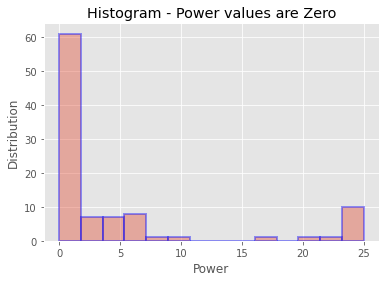

In [6]:
# dataframe where power is zero

zeros = df.loc[df['power'] == 0]

# Plot a histogram of zero values generated

sns.distplot(zeros, kde=False, hist_kws=dict(edgecolor="b", linewidth=2))
plt.title('Histogram - Power values are Zero')
plt.xlabel('Power')
plt.ylabel('Distribution')
plt.show()


## Data visualisation - Scatterplot with seaborn

#### Plot the scatterplot of the dataset

The scatterplot below is a visual representation of the speed and power variables witin the dataset. We can see that the plot forms an S curve.

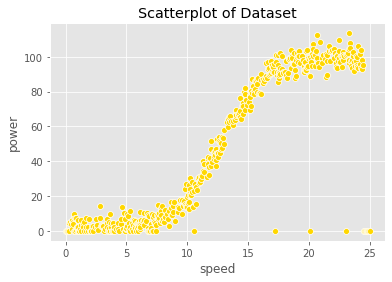

In [7]:
# Plot the data points as a scatterplot to visualise the data

sns.scatterplot(data = df, x="speed", y="power", color='gold')
plt.title('Scatterplot of Dataset')
plt.show()

#### Linear Regression Plot with seaborn

The following plot via the seaborn package shows the linear regression line on the dataset.  

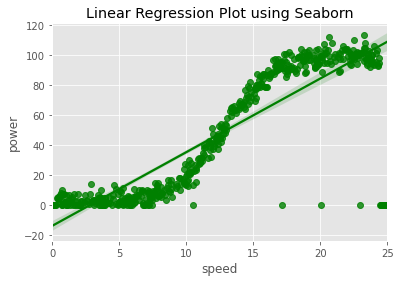

In [8]:
#use the linear regresssion plot within seaborn, to visualise the linear regression line

sns.regplot(data = df, x="speed", y="power", color='green')
plt.title('Linear Regression Plot using Seaborn')
plt.show()

#### Calculate the coerrelation coefficient and R-squared for the entire dataset

The following cells calculates the correlation coefficient and the R-squared values of the dataset. As can be seen the Correlation coefficient is 85% and the R-Squared value is 72% which can be deemed a reasonable value in terms of the data being observed.


As per Investopedia: https://www.investopedia.com/terms/r/r-squared.asp:
> R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R2 of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.

>What is a good R-Squared Value
What qualifies as a “good” R-Squared value will depend on the context. In some fields, such as the social sciences, even a relatively low R-Squared such as 0.5 could be considered relatively strong. In other fields, the standards for a good R-Squared reading can be much higher, such as 0.9 or above. 

In other words while, 72% is a resonable R-Squared value for a dataset, the S shaped nature of the curve means that the predictions based on the linear regression model may not be as accurate as desired.

We will look at the predictions and correlation coefficents of various models, including a customised model in the sections below.

In [9]:
correlation_xy = np.corrcoef(df['speed'],df['power'])[0,1]


r_squared = correlation_xy**2

print('Correlation Coefficient is', round(correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(r_squared*100, 2),'%')

Correlation Coefficient is 85.38 %
R-Squared Value is 72.89 %


## Linear Regression Model

We will first explore the linear regression model in the Scikit-Learn module, in order to predict the wind turbine power from wind speed observations.

In order to do this we will import the Linear Regression model from Sklearn. We import also the test, train module from sklearn in order to check the accuracy of the predictions from our model. 

We reshaped the data in order to extract the test and train samples from the data. We then used the fit function in order to train the Linear Regression model.

We extracted the r-squared values and the coefficients from the data. The r-squared value was consistent with the calcululation in the above section using numpy.

We then used the model to predict the values of the 'test' sample and compared it with the actual values. We also plotted a graph of the predicted and actual values using the model and calculated the correlation coefficient of them. 

#### Reshape data and obtain train and test data for the Linear Regression model

In [10]:
#Reshape the data for the linear model

X = df.iloc[:, :-1].values 
y = df.iloc[:, 1].values

In [11]:
#Split the dataset into train and test proportions (80% train and 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#### Fit the train data to the Linear Regression model

In [12]:
#Instantiate the linear model and fit the training data to the model

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

#### Calculate the R-Squared and Coeficcients for the Linear Regression model

In [13]:
lin_model.score(X, y) # R-Squared value from the model

0.7280479565948995

In [14]:
print(lin_model.intercept_) #The y intercept  of the linear regression line

-14.910098990646418


In [15]:
print(lin_model.coef_) # The coefficient or 'slope' of the linear regression line

[5.05601683]


#### Make predictions on the test data based on the trained model

In [16]:
y_pred_lin = lin_model.predict(X_test) #Generate the predicted data based on the linear model

#### Analyse the output from the Train and Test Linear Regression Model

     Speed   Actual   Predicted
0   23.574  101.120  104.280442
1   15.766   84.133   64.803062
2    7.257    5.252   21.781415
3    6.456    3.510   17.731546
4   16.366   88.042   67.836672
..     ...      ...         ...
95   5.781    0.000   14.318734
96   8.534   11.422   28.237949
97   0.851    7.350  -10.607429
98  12.287   43.454   47.213180
99   6.406    6.446   17.478745

[100 rows x 3 columns]
The R-Squared value for the Predicted vs Actual Data is: 54.18032938039061 %
The power prediction for the wind speed of 50 is: [237.89074238]


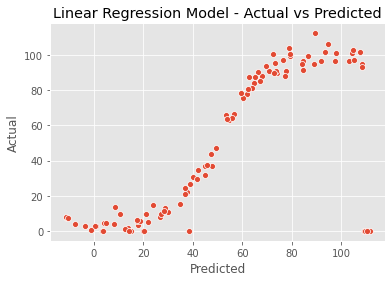

In [61]:
act_vs_pred_lin = pd.DataFrame({'Speed': X_test.reshape(-1), 'Actual': y_test, 'Predicted': y_pred_lin})

sns.scatterplot(act_vs_pred_lin['Predicted'], act_vs_pred_lin['Actual'])
plt.title('Linear Regression Model - Actual vs Predicted')

print(act_vs_pred_lin)

print('The R-Squared value for the Predicted vs Actual Data is:', (np.corrcoef(act_vs_pred_lin['Predicted'],act_vs_pred_lin['Actual'])[0,1])**2*100, '%')

test_predict = np.array(50).reshape(-1,1) # Test the impact of a higher value than in the orginal dataset.
print('The power prediction for the wind speed of 50 is:', lin_model.predict(test_predict))


#### Observations from the Linear Regression model

- We would expect the scatterplot of the actual vs predicted to be a straight line as we would expect the predicted and actual values to be identical (for a perfect model).
- Interestingly the shape of the scatterplot of comparisons very closely mirrors the original data. This makes sense as a linear fit will cause linear differences between the predicted and the actual data and hence the shape of the data in the above scatteplot will be maintained.
- The middle value will give a better fit than the top and bottom of the S curve of the plot. This is because the middle values of the curve have a more 'Linear' relationship than either end of the curve.
- If we look at the predicted vs actual table, we can see that the predicted values are consistently lower than the actual values except where for wind speeds between 0 and 12 which yeild predictions that are greater than the actual values. Once again the main reason for this is that a linear model is being fit to S shape data and so there will be consistent deviations in the predicted vs actual data where the S shape is the most prominent.
- If we try to predict higer values of 'speed' than those in the actual data, we will see the 'power' input consistently increase. This is because we are using a linear model which does not take into account the 'cut-off' values of the speed on the wind turbine. In the test case above, a speed of 50 will give a power observation of 238, which will be unlikely given that the maximum actual observed data is circa 113 and that the data has an S shape which flattens out at the higher wind speeds.
- As we have not used the 'random_state' argument in the test/train extraction, the test and train samples will be different each time we run the notebook and this could have an impact on the output. Overall we expect the observations to remain consistent.

## Using the Lasso Regression model

We explored the Lasson Regression model to see whether we could enhance the Linear regression.

As per the Wikipedia page:

>In statistics and machine learning, lasso (least absolute shrinkage and selection operator; also Lasso or LASSO) is a regression analysis method that performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability of the resulting statistical model.

The Lasso model is used to enhance the Linear Regression model and hence we will observe whether this will have a significant impact on the predictions of the model. It does this by shrinking and regularising the coefficients within the linear model to produce more accurate predictions. 

The main argument within the Lasso model is the alpha value.

As per https://www.analyticsvidhya.com/blog/2016/01/ridge-lasso-regression-python-complete-tutorial/:

>α = 0: Same coefficients as simple linear regression
>
>α = ∞: All coefficients zero
>
>0 < α < ∞: coefficients between 0 and that of simple linear regression


We will use an alpha of 50 in order to check the efficacy of the Lasso model and see whether this improves our observations.

     Speed   Actual  Predicted
0   23.574  101.120  93.725540
1   15.766   84.133  61.632585
2    7.257    5.252  26.658334
3    6.456    3.510  23.366011
4   16.366   88.042  64.098745
..     ...      ...        ...
95   5.781    0.000  20.591582
96   8.534   11.422  31.907144
97   0.851    7.350   0.327972
98  12.287   43.454  47.332971
99   6.406    6.446  23.160498

[100 rows x 3 columns]
The R-Squared value for the Predicted vs Actual Data is: 54.18032938039057 %
The power prediction for the wind speed of 50 is: [202.34342302]


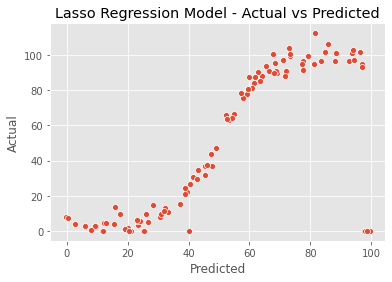

In [79]:
from sklearn import linear_model

lasso = linear_model.Lasso(alpha=50)
lasso.fit(X_train, y_train)

y_pred_lasso = lasso.predict(X_test)


act_vs_pred_lasso = pd.DataFrame({'Speed': X_test.reshape(-1), 'Actual': y_test, 'Predicted': y_pred_lasso})

sns.scatterplot(act_vs_pred_lasso['Predicted'], act_vs_pred_lasso['Actual'])
plt.title('Lasso Regression Model - Actual vs Predicted')

print(act_vs_pred_lasso)


print('The R-Squared value for the Predicted vs Actual Data is:', (np.corrcoef(act_vs_pred_lasso['Predicted'], act_vs_pred_lasso['Actual'])[0,1])**2*100, '%')

test_predict = np.array(50).reshape(-1,1) # Test the impact of a higher value than in the orginal dataset.
print('The power prediction for the wind speed of 50 is:', lasso.predict(test_predict))


#### Observation from the Lasso Regression Model
- The shape of the actual vs predicted does not seem signifcantly different to the similar Linear regression plot in the prevous section.
- By looking at the actual vs predicted values of the lasso regression table and comparing it to the linear regression table above, we can see that the predicted values have changed, but in most cases these have not changed signifcantly enough to make a substantial difference to the overall plot. Once again the values at the higher and lower values of the S curve seem to be more affected by the change to lasso than the middle values.
- Interestingly the R-Squared values are exactly the same for both the Linear and the Lasso models, which understandbly implies that, while the indivdual values have changed the overall shape of the distribution has not changed. The r-squared values remaining the same is an indication of this.
- We can see that predicting higher speed values (i.e. higher than in the original dataset) will yeild power values which are still above the maximum value within the dataset and not conistent with the S shape curve of a typical wind turbine dataset. However, the predictions under the lasso model are lower than the values generated using the Linear Regression model. If we continue to increase the alpha value, this will further come decrease. 

## Exploring Polynomial Regression

### Polynomial Regression in Using Numpy

Correlation Coefficient is 93.68 %
R-Squared Value is 87.76 %
The polynomial equation for polynomial dataset is: 
           3         2
-0.04747 x + 1.728 x - 11.43 x + 16.12


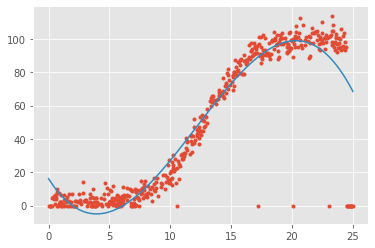

In [59]:
# Ref: https://www.w3schools.com/python/python_ml_polynomial_regression.asp

#Used the polyfit function in numpy to generate the coeffients.

# Used the Train and Test data from above to build a polynomial model and test the predictions from the model

import numpy as np

a =  df["speed"]
b = df["power"]


#Used the test and train data from the Linear Regression model above. Reshaped the data for use in the polyfit function.
model_train_x = X_train.reshape(-1)
model_train_y = y_train.reshape(-1)

model_test_x = X_test.reshape(-1)
model_test_y = y_test.reshape(-1)


poly_model = np.poly1d(np.polyfit(model_train_x, model_train_y, 3)) #Used polyfit to generate the coefficients


plt.plot(a, b, '.', a, poly_model(a), '-') #plotted the original data with regression line fitted based on the trained model


poly_correlation_xy = np.corrcoef(b, poly_model(a))[0,1] # Calculated the correlation
                                             
poly_r_squared = poly_correlation_xy**2 # Calculated the R-Squared


print('Correlation Coefficient is', round(poly_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(poly_r_squared * 100, 2),'%')
print('The polynomial equation for polynomial dataset is: \n', 
      poly_model)



,Actual,Predicted
0,101.120,84.887871
1,84.133,79.295149
2,5.252,5.993057
3,3.510,1.542098
4,88.042,83.688248
...,...,...
95,0.000,-1.409285
96,11.422,14.871518
97,7.350,7.609038
98,43.454,48.420346


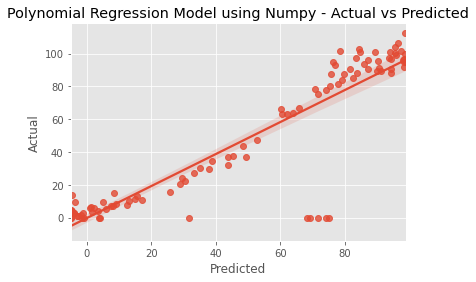

In [20]:
# Predict the test data based on the trained model and compared to actual test data


act_poly_vs_pred_poly = pd.DataFrame({'Actual': model_test_y, 'Predicted': poly_model(model_test_x)})

sns.regplot(act_poly_vs_pred_poly['Predicted'], act_poly_vs_pred_poly['Actual']) #plotted the predicted vs actual data
plt.title('Polynomial Regression Model using Numpy - Actual vs Predicted')


act_poly_vs_pred_poly

### Polynomial Regression using Sklearn

In [21]:
# Reference: https://www.analyticsvidhya.com/blog/2020/03/polynomial-regression-python/

# Build the training model inspired by the blog above

from sklearn.linear_model import LinearRegression

# importing libraries for polynomial transform
from sklearn.preprocessing import PolynomialFeatures

# Creating pipeline to automate the regression formula
from sklearn.pipeline import Pipeline

# creating pipeline and fitting it on data
Input = [('polynomial',PolynomialFeatures(degree=10)),('model',LinearRegression())]
pipe = Pipeline(Input)

#Training the model
pipe.fit(X_train, y_train)


Pipeline(steps=[('polynomial', PolynomialFeatures(degree=10)),
                ('model', LinearRegression())])

,Actual,Predicted
0,101.120,100.785059
1,84.133,81.416632
2,5.252,4.497971
3,3.510,4.480782
4,88.042,86.182829
...,...,...
95,0.000,5.012664
96,11.422,8.345804
97,7.350,4.411442
98,43.454,46.348509


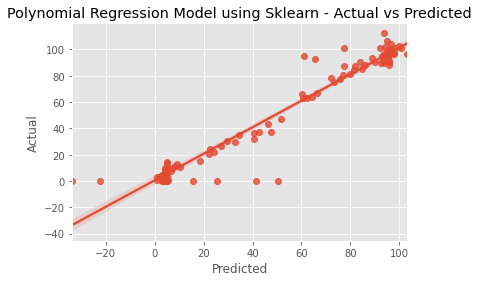

In [22]:
#Predicting the test data based on the polynomial features from sklearn

poly_pred_sk = pipe.predict(X_test)

act_vs_pred_poly_sk = pd.DataFrame({'Actual': y_test, 'Predicted': poly_pred_sk}) #comparing predicted vs actual data

sns.regplot(act_vs_pred_poly_sk['Predicted'], act_vs_pred_poly_sk['Actual'])
plt.title('Polynomial Regression Model using Sklearn - Actual vs Predicted')


act_vs_pred_poly_sk

## Building a customised model for regression

Analysing the original scatterplot data, it can be observed that the data form an S-Curve. In other words the curve remains constant at a certain upper and lower ranges of values for the independent variable. 

In the current dataset, we can see that the power output is nil or near to nil for certain values lower values of wind 'speed'. We also note that after a certain wind speed no additional power is generated.

Again, observing the data we can see that for windspeed of less 8 the power remains very low and can be estimated to be Nil. Also where the speed is > 18 the power remains constant at around 100. There also seem to be anomolies within the data where at random points in the dataset the power output seems to be zero. It is reasonable to assume that these are error in collecting, collating or recording the data.

I have produced a cleaned dataset to remove all observations where:
- The 'speed' is less than 8
- The 'speed' is greater than or equal than 18
- The 'power' is Nil

I then plotted the new dataset and calculated the correlation coefficient and the R-Squared values for the new dataset. As can be seen below the new dataset is highly correlated with a R-Squared value of 97%.

Correlation Coefficient is 98.49 %
R-Squared Value is 96.99 %
The polynomial equation for the clean dataset is:  
10.35 x - 81.68


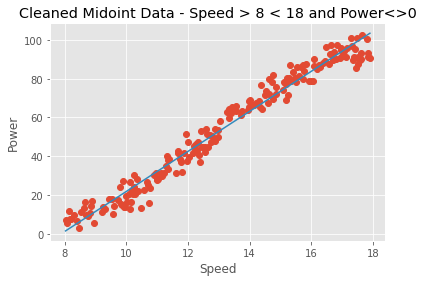

In [23]:
# Clean the dataframe to include only centre of the curve
# --------------------------------------------------------

clean_df = df.query('speed > 8  & speed < 18 & power != 0')


# Create Train and test data with pandas
#-----------------------------------------------
# Ref: https://stackoverflow.com/questions/39835021/pandas-random-sample-with-remove
# Ref: https://www.geeksforgeeks.org/how-to-randomly-select-rows-from-pandas-dataframe/


Train_clean = clean_df.sample(frac = 0.8)
Test_clean =  clean_df.drop(Train_clean.index)

X_train_clean = Train_clean['speed']
X_test_clean = Test_clean['speed']
y_train_clean = Train_clean['power']
y_test_clean  = Test_clean['power']


# Use polyfit to create the polynomial equation for the dataset using the training data
# -----------------------------------------------------------------------------------------

p_clean = np.poly1d(np.polyfit(X_train_clean, y_train_clean, 1))


# Calculate the Correlation Coefficeints and R-Squared of the cleaned dataset
# ----------------------------------------------------------------------------

clean_df_correlation_xy = np.corrcoef(clean_df['speed'],p_clean(clean_df['power']))[0,1]

clean_df_r_squared = clean_df_correlation_xy**2


# Print out the coeffients and the polynomial euquation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is:', p_clean)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(clean_df['speed'], clean_df['power'], 'o', clean_df['speed'], p_clean(clean_df['speed']), '-') #plotted the original data with regression line fitted based on the trained model
plt.title('Cleaned Midoint Data - Speed > 8 < 18 and Power<>0')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.style.use('ggplot')
plt.show()

I considered a mutistep model where the output values predicted would be based on a multi-step model based on the value of the input.

In essence this will be similar to the polynomial regression model above, however this will be more streamlined as it will segregate the highly correlated linear model data seperately.

I considered, using fixed output value for the data where the input range was <8 and >18, however, I decided it would be better to break down the data into the 3 components of the S curve (cut-in values and cut-off values) and use separate regression values for each of the component.

In the next code cell I segregated the data into the top and bottom component of the S curve and checked the best regression coefficients and technique for these components.

Correlation Coefficient is 40.11 %
R-Squared Value is 16.09 %
The polynomial equation for the clean dataset is: 
         2
0.2522 x - 1.715 x + 6.371


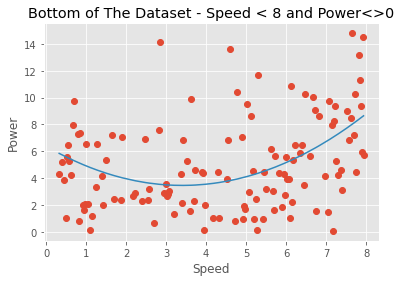

In [24]:
# Clean the dataframe to include only the bottom of the curve
# --------------------------------------------------------

bottom_clean_df = df.query('speed <=8 & power != 0')


# Create Train and test data with pandas
#-----------------------------------------------

Train_clean_bottom = bottom_clean_df.sample(frac = 0.8)
Test_clean_bottom =  bottom_clean_df.drop(Train_clean_bottom.index)

X_train_clean_bottom = Train_clean_bottom['speed']
X_test_clean_bottom = Test_clean_bottom['speed']
y_train_clean_bottom = Train_clean_bottom['power']
y_test_clean_bottom  = Test_clean_bottom['power']


# Use polyfit to create the polynomial equation for the dataset using the training data
# -----------------------------------------------------------------------------------------

p_bottom = np.poly1d(np.polyfit(X_train_clean_bottom, y_train_clean_bottom, 2))



# Calculate the Correlation Coefficeints and R-Squared of the cleaned dataset
# ----------------------------------------------------------------------------

bottom_clean_df_correlation_xy = np.corrcoef(bottom_clean_df['power'], p_bottom(bottom_clean_df['speed']))[0,1]
                                             
bottom_clean_df_r_squared = bottom_clean_df_correlation_xy**2



# Print out the coeffients and the polynomial euquation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(bottom_clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(bottom_clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is: \n', 
      p_bottom)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(bottom_clean_df['speed'], bottom_clean_df['power'], 'o', bottom_clean_df['speed'], p_bottom(bottom_clean_df['speed']), '-')
plt.title('Bottom of The Dataset - Speed < 8 and Power<>0')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()



Correlation Coefficient is 19.85 %
R-Squared Value is 3.94 %
The polynomial equation for the clean dataset is:  
0.5834 x + 86.3


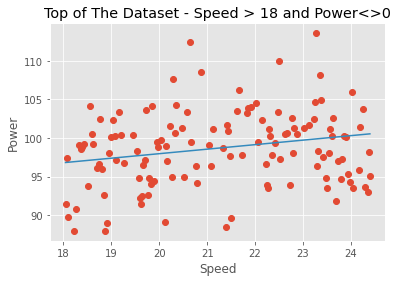

In [25]:
# Clean the dataframe to include only the top of the curve
# --------------------------------------------------------

top_clean_df = df.query('speed >=18 & power != 0')

# Create Train and test data with pandas
#-----------------------------------------------

Train_clean_top = top_clean_df.sample(frac = 0.8)
Test_clean_top =  top_clean_df.drop(Train_clean_top.index)

X_train_clean_top = Train_clean_top['speed']
X_test_clean_top = Test_clean_top['speed']
y_train_clean_top = Train_clean_top['power']
y_test_clean_top  = Test_clean_top['power']


# Use polyfit to create the polynomial equation for the dataset using the training data
# -----------------------------------------------------------------------------------------

p_top = np.poly1d(np.polyfit(X_train_clean_top, y_train_clean_top, 1)) #may be better to use linear function for this as well


# Calculate the Correlation Coefficeints and R-Squared of the cleaned dataset
# ----------------------------------------------------------------------------

top_clean_df_correlation_xy = np.corrcoef(top_clean_df['power'], p_top(top_clean_df['speed']))[0,1]
                                             
top_clean_df_r_squared = top_clean_df_correlation_xy**2


# Print out the coeffients and the polynomial euquation for the curve
# --------------------------------------------------------------------

print('Correlation Coefficient is', round(top_clean_df_correlation_xy * 100, 2), '%')
print('R-Squared Value is', round(top_clean_df_r_squared*100, 2),'%')
print('The polynomial equation for the clean dataset is:', p_top)


# Plot the datapoint of the dataframe and the regression line based on the trained model
# -------------------------------------------------------------------------------------------

plt.plot(top_clean_df['speed'], top_clean_df['power'], 'o', top_clean_df['speed'], p_top(top_clean_df['speed']), '-')
plt.title('Top of The Dataset - Speed > 18 and Power<>0')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.show()



#### Predictions based on the model

I used the Linear Regression model from sklearn to obtain the intercept and slope for the cleaned dataset. I then used the select function in numpy to 'predict' the 'power' variable based on certain conditions of the 'speed' data. These conditions mirrored the cleaned data criteria and are as follows:

- [TO BE COMPLETED]

      Speed   Actual  Predicted
359  18.043   91.490  96.831536
381  19.044  102.364  97.415545
387  19.444  100.372  97.648915
389  19.570   94.850  97.722426
400  19.895   94.489  97.912039
..      ...      ...        ...
139   7.082    9.779   6.875543
142   7.182    0.067   7.063803
151   7.558    6.853   7.816801
159   7.858    9.385   8.468745
162   7.933    5.696   8.638825

[91 rows x 3 columns]


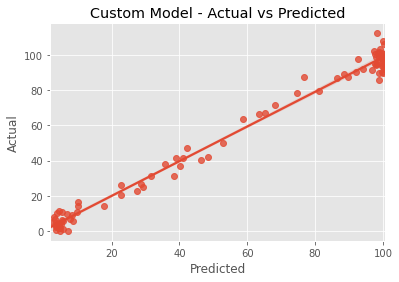

In [74]:
# Code for customised model

X_test_concat = pd.concat([X_test_clean_top, X_test_clean, X_test_clean_bottom])
y_test_concat = pd.concat([y_test_clean_top, y_test_clean, y_test_clean_bottom])


y_pred_model = np.select(
    (X_test_concat<= 8, 
     X_test_concat >= 18, 
     (X_test_concat > 8) | (X_test_concat < 18)), 
    (p_bottom(X_test_concat), 
     p_top(X_test_concat), 
     p_clean(X_test_concat)))



act_vs_pred_custom = pd.DataFrame({'Speed': X_test_concat, 'Actual': y_test_concat, 'Predicted': y_pred_model}) #comparing predicted vs actual data

sns.regplot(act_vs_pred_custom['Predicted'], act_vs_pred_custom['Actual'])
plt.title('Custom Model - Actual vs Predicted')


print(act_vs_pred_custom)


### Reference:

https://stackabuse.com/linear-regression-in-python-with-scikit-learn/